# Comparative Analysis of Classification Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('StressLevelDataset.csv')
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [2]:
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.drop('stress_level', axis=1)
y = data['stress_level']
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
# Function definition to implement Logistic Regression, KNN, Decision Tree, Naive Bayes and SVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def classify_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB(),
        'Support Vector Machine': SVC()
    }
    
    results = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        results[model_name] = {
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': cm
        }
        
    return results

results = classify_and_evaluate(X_scaled, y)
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.8818
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.88      0.88      0.88        73
           2       0.91      0.90      0.91        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

Confusion Matrix:
[[66  6  4]
 [ 7 64  2]
 [ 4  3 64]]
--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.8682
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        76
           1       0.86      0.89      0.87        73
           2       0.90      0.86      0.88        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

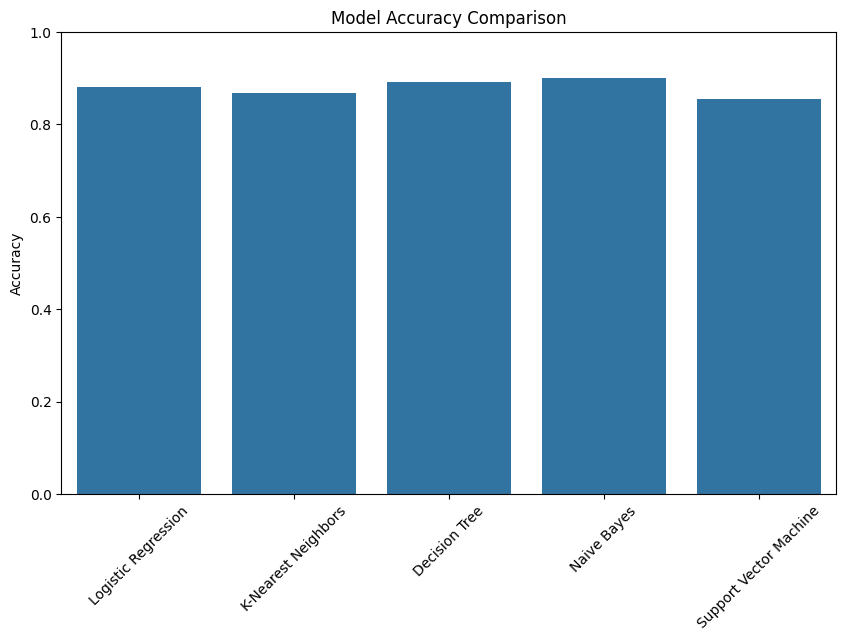

In [9]:
# Visualize the comparision
model_names = list(results.keys())
accuracies = [metrics['accuracy'] for metrics in results.values()]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [10]:
# Hyperparamer finetuning using GridSearchCV for all models
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        'Logistic Regression': (LogisticRegression(), {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }),
        'K-Nearest Neighbors': (KNeighborsClassifier(), {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }),
        'Decision Tree': (DecisionTreeClassifier(), {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }),
        'Naive Bayes': (GaussianNB(), {
            'var_smoothing': [1e-09, 1e-08, 1e-07]
        }),
        'Support Vector Machine': (SVC(), {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        })
    }
    
    tuned_results = {}
    
    for model_name, (model, params) in models.items():
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        tuned_results[model_name] = {
            'best_params': grid_search.best_params_,
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': cm
        }
        
    return tuned_results
tuned_results = hyperparameter_tuning(X_scaled, y)
for model_name, metrics in tuned_results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {metrics['best_params']}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("-" * 50)
    

Model: Logistic Regression
Best Parameters: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.8818
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.88      0.88      0.88        73
           2       0.91      0.90      0.91        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

Confusion Matrix:
[[66  6  4]
 [ 7 64  2]
 [ 4  3 64]]
--------------------------------------------------
Model: K-Nearest Neighbors
Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.8455
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        76
           1       0.86      0.86      0.86        73
           2       0.86      0.83      0.84        71

    accuracy                           0.85       220
